## [미니프로젝트] 악성사이트 탐지 머신러닝 모델 개발

## <b>[2단계] 데이터 분석 및 전처리

## ▣ 데이터 소개 - 분류!!!!!!
* 학습 데이터셋 : train.csv
<br>

## ▣ 학습 데이터셋의 변수 소개

* url_len : URL 길이
* url_num_hypens_dom : URL내 '-'(하이픈) 개수
* url_path_len : URL의 경로 길이
* url_domain_len : URL의 도메인 길이
* url_host_name : URL의 hostname 길이
* url_num_dots : URL내 '.'(닷) 개수
* url_num_underscores : URL내 '_'(언더바) 개수
* url_query_len : URL쿼리 길이
* url_num_query_para : URL쿼리의 파라미터 개수
* url_ip_present : URL내 IP표시 여부
* url_entropy : URL 복잡도
* url_chinese_present : URL내 중국어 표기 여부
* url_port : URL내 포트 표기 여부
* html_num_tags('iframe') : HTML내 'iframe' 태그 개수
* html_num_tags('script') : HTML내 'script' 태그 개수
* html_num_tags('embed') : HTML내 'embed' 태그 개수
* html_num_tags('object') : HTML내 'object' 태그 개수
* html_num_tags('div') : HTML내 'div' 태그 개수
* html_num_tags('head') : HTML내 'head' 태그 개수
* html_num_tags('body') : HTML내 'body' 태그 개수
* html_num_tags('form') : HTML내 'form' 태그 개수
* html_num_tags('a') : HTML내 'a' 태그 개수
* html_num_tags('applet') : HTML내 'applet' 태그 개수
* **label : 악성사이트 여부 컬럼 ( 'malicious'는 악성사이트, 'benign'은 정상사이트 ) target!!**

<br>

---

### **[프로세스]**
0. 라이브러리 import 및 데이터 불러오기
1. 데이터 분석하기
2. 데이터 전처리하기


---

# <b>Step 0. 라이브러리 import 및 데이터 불러오기
### **가. 라이브러리 import**

In [1]:
!pip install mljar-supervised

     -------------------------------------- 112.7/112.7 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     --------------------------------------- 74.0/74.0 MB 20.4 MB/s eta 0:00:00
     ---------------------------------------- 90.5/90.5 kB ? eta 0:00:00
     ------------------------------------- 435.6/435.6 kB 28.4 MB/s eta 0:00:00
     -------------------------------------- 153.1/153.1 kB 9.5 MB/s eta 0:00:00
     ---------------------------------------- 81.2/81.2 kB 4.4 MB/s eta 0:00:00
     ------------------------------------- 365.3/365.3 kB 22.2 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB ? eta 0:00:00
     ---------------------------------------- 212.2/212.2 kB ? eta 0:00:00
     ---------------------------------------- 78.7/78.7 kB ? eta 0:00:00
  Created wheel for mljar-supervised: filename=mljar_supervised-0.11.5-py3-none-any.whl size=147048 sha256=3ae7311adf0f234f5

In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### **나.  학습데이터 불러오기**

In [140]:
df_train = pd.read_csv("train.csv", sep = ",")

In [141]:
df_train.isnull().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               1
url_domain_len             1
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
label                      0
dtype: int64

In [142]:
df_train["url_path_len"].fillna(0, inplace = True)
df_train["url_domain_len"].fillna(0, inplace = True)

In [143]:
df_train.isnull().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               0
url_domain_len             0
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
label                      0
dtype: int64

In [144]:
df_train.drop(["html_num_tags('applet')", "url_chinese_present", "html_num_tags('object')", "html_num_tags('embed')"], axis = 1, inplace = True)

In [145]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3664 non-null   float64
 1   url_num_hyphens_dom      3664 non-null   float64
 2   url_path_len             3664 non-null   float64
 3   url_domain_len           3664 non-null   float64
 4   url_hostname_len         3664 non-null   float64
 5   url_num_dots             3664 non-null   float64
 6   url_num_underscores      3664 non-null   float64
 7   url_query_len            3664 non-null   float64
 8   url_num_query_para       3664 non-null   float64
 9   url_ip_present           3664 non-null   float64
 10  url_entropy              3664 non-null   float64
 11  url_port                 3664 non-null   float64
 12  html_num_tags('iframe')  3664 non-null   float64
 13  html_num_tags('script')  3664 non-null   float64
 14  html_num_tags('div')    

In [146]:
df_train["html_num_tags('head')"] = df_train["html_num_tags('head')"].astype(int)

In [147]:
df_train["html_num_tags('body')"] = df_train["html_num_tags('body')"].astype(int)

In [148]:
df_train["url_port"] = df_train["url_port"].astype(int)

In [149]:
df_train["url_ip_present"] = df_train["url_ip_present"].astype(int)

In [150]:
one_head = pd.get_dummies(df_train["html_num_tags('head')"], prefix = "html_num_tags('head')")
one_body = pd.get_dummies(df_train["html_num_tags('body')"], prefix = "html_num_tags('body')")
one_ip = pd.get_dummies(df_train["url_ip_present"], prefix = "url_ip_present")
one_port = pd.get_dummies(df_train["url_port"], prefix = "url_port")

In [151]:
df_train = pd.concat([df_train, one_head, one_body, one_ip, one_port], axis = 1)

In [152]:
df_train

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('head')_2,html_num_tags('head')_3,html_num_tags('body')_0,html_num_tags('body')_1,html_num_tags('body')_2,html_num_tags('body')_3,url_ip_present_0,url_ip_present_1,url_port_0,url_port_1
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0,...,0,0,0,1,0,0,1,0,1,0
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0,...,0,0,0,1,0,0,1,0,1,0
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0,...,0,0,0,1,0,0,1,0,1,0
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0,...,0,0,0,1,0,0,1,0,1,0
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3659,68.0,3.0,16.0,52.0,52.0,2.0,0.0,0.0,0.0,0,...,0,0,0,1,0,0,1,0,1,0
3660,66.0,0.0,48.0,18.0,18.0,2.0,0.0,0.0,0.0,0,...,0,0,0,1,0,0,1,0,1,0
3661,90.0,1.0,64.0,26.0,26.0,4.0,0.0,0.0,0.0,0,...,0,0,0,1,0,0,1,0,1,0
3662,46.0,0.0,33.0,13.0,13.0,3.0,0.0,0.0,0.0,0,...,0,0,0,1,0,0,1,0,1,0


In [154]:
df_train.drop("html_num_tags('head')_3", axis = 1, inplace = True)

In [155]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3664 non-null   float64
 1   url_num_hyphens_dom      3664 non-null   float64
 2   url_path_len             3664 non-null   float64
 3   url_domain_len           3664 non-null   float64
 4   url_hostname_len         3664 non-null   float64
 5   url_num_dots             3664 non-null   float64
 6   url_num_underscores      3664 non-null   float64
 7   url_query_len            3664 non-null   float64
 8   url_num_query_para       3664 non-null   float64
 9   url_ip_present           3664 non-null   int32  
 10  url_entropy              3664 non-null   float64
 11  url_port                 3664 non-null   int32  
 12  html_num_tags('iframe')  3664 non-null   float64
 13  html_num_tags('script')  3664 non-null   float64
 14  html_num_tags('div')    

In [156]:
df_train.replace('benign', 0, inplace = True)
df_train.replace('malicious', 1, inplace = True)

In [157]:
df_train["label"].value_counts()

0    1858
1    1806
Name: label, dtype: int64

In [158]:
df_train.to_csv("df_train.csv", index = False)

---

In [159]:
df_test = pd.read_csv("test.csv", sep = ",", index_col = 0)

In [160]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2441 entries, 0 to 2440
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  2441 non-null   int64  
 1   url_num_hyphens_dom      2441 non-null   int64  
 2   url_path_len             1975 non-null   float64
 3   url_domain_len           1975 non-null   float64
 4   url_hostname_len         1978 non-null   float64
 5   url_num_dots             2441 non-null   int64  
 6   url_num_underscores      2441 non-null   int64  
 7   url_query_len            2441 non-null   int64  
 8   url_num_query_para       2441 non-null   int64  
 9   url_ip_present           2441 non-null   int64  
 10  url_entropy              2441 non-null   float64
 11  url_chinese_present      2441 non-null   int64  
 12  url_port                 2441 non-null   int64  
 13  html_num_tags('iframe')  2441 non-null   int64  
 14  html_num_tags('script') 

In [161]:
df_test.drop(["html_num_tags('applet')", "url_chinese_present", "html_num_tags('object')", "html_num_tags('embed')"], axis = 1, inplace = True)

In [104]:
df_test["html_num_tags('head')"].value_counts()

1    2404
2      19
0      17
9       1
Name: html_num_tags('head'), dtype: int64

In [105]:
df_test["html_num_tags('body')"].value_counts()

1    2329
2      69
0      38
3       5
Name: html_num_tags('body'), dtype: int64

In [106]:
df_test["url_ip_present"].value_counts()

0    2286
1     155
Name: url_ip_present, dtype: int64

In [107]:
df_test["url_port"].value_counts()

0    2440
1       1
Name: url_port, dtype: int64

In [162]:
one_head = pd.get_dummies(df_test["html_num_tags('head')"], prefix = "html_num_tags('head')")
one_body = pd.get_dummies(df_test["html_num_tags('body')"], prefix = "html_num_tags('body')")
one_ip = pd.get_dummies(df_test["url_ip_present"], prefix = "url_ip_present")
one_port = pd.get_dummies(df_test["url_port"], prefix = "url_port")

In [163]:
df_test = pd.concat([df_test, one_head, one_body, one_ip, one_port], axis = 1)

In [164]:
df_test

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('head')_2,html_num_tags('head')_9,html_num_tags('body')_0,html_num_tags('body')_1,html_num_tags('body')_2,html_num_tags('body')_3,url_ip_present_0,url_ip_present_1,url_port_0,url_port_1
id,,,,,,,,,,,,,,,,,,,,,
0,97,0,80.0,17.0,17.0,4,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
1,37,0,22.0,15.0,15.0,3,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2,44,0,NaN,20.0,20.0,3,3,0,0,0,...,0,0,0,1,0,0,1,0,1,0
3,40,0,14.0,26.0,26.0,2,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,43,2,NaN,26.0,26.0,2,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,63,0,NaN,17.0,NaN,4,2,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2437,36,0,1.0,35.0,35.0,2,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2438,45,1,23.0,22.0,NaN,2,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [165]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2441 entries, 0 to 2440
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  2441 non-null   int64  
 1   url_num_hyphens_dom      2441 non-null   int64  
 2   url_path_len             1975 non-null   float64
 3   url_domain_len           1975 non-null   float64
 4   url_hostname_len         1978 non-null   float64
 5   url_num_dots             2441 non-null   int64  
 6   url_num_underscores      2441 non-null   int64  
 7   url_query_len            2441 non-null   int64  
 8   url_num_query_para       2441 non-null   int64  
 9   url_ip_present           2441 non-null   int64  
 10  url_entropy              2441 non-null   float64
 11  url_port                 2441 non-null   int64  
 12  html_num_tags('iframe')  2441 non-null   int64  
 13  html_num_tags('script')  1974 non-null   float64
 14  html_num_tags('div')    

In [166]:
df_test.drop("html_num_tags('head')_9", axis = 1, inplace = True)

In [167]:
df_test.isnull().sum()

url_len                      0
url_num_hyphens_dom          0
url_path_len               466
url_domain_len             466
url_hostname_len           463
url_num_dots                 0
url_num_underscores          0
url_query_len                0
url_num_query_para           0
url_ip_present               0
url_entropy                  0
url_port                     0
html_num_tags('iframe')      0
html_num_tags('script')    467
html_num_tags('div')         0
html_num_tags('head')        0
html_num_tags('body')        0
html_num_tags('form')      467
html_num_tags('a')         461
html_num_tags('head')_0      0
html_num_tags('head')_1      0
html_num_tags('head')_2      0
html_num_tags('body')_0      0
html_num_tags('body')_1      0
html_num_tags('body')_2      0
html_num_tags('body')_3      0
url_ip_present_0             0
url_ip_present_1             0
url_port_0                   0
url_port_1                   0
dtype: int64

In [168]:
df_test[["url_path_len", "url_domain_len", "url_hostname_len", "html_num_tags('script')", "html_num_tags('form')", "html_num_tags('a')"]] = df_test[["url_path_len", "url_domain_len", "url_hostname_len", "html_num_tags('script')", "html_num_tags('form')", "html_num_tags('a')"]].fillna(0)

In [169]:
df_test.isnull().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               0
url_domain_len             0
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('head')_0    0
html_num_tags('head')_1    0
html_num_tags('head')_2    0
html_num_tags('body')_0    0
html_num_tags('body')_1    0
html_num_tags('body')_2    0
html_num_tags('body')_3    0
url_ip_present_0           0
url_ip_present_1           0
url_port_0                 0
url_port_1                 0
dtype: int64

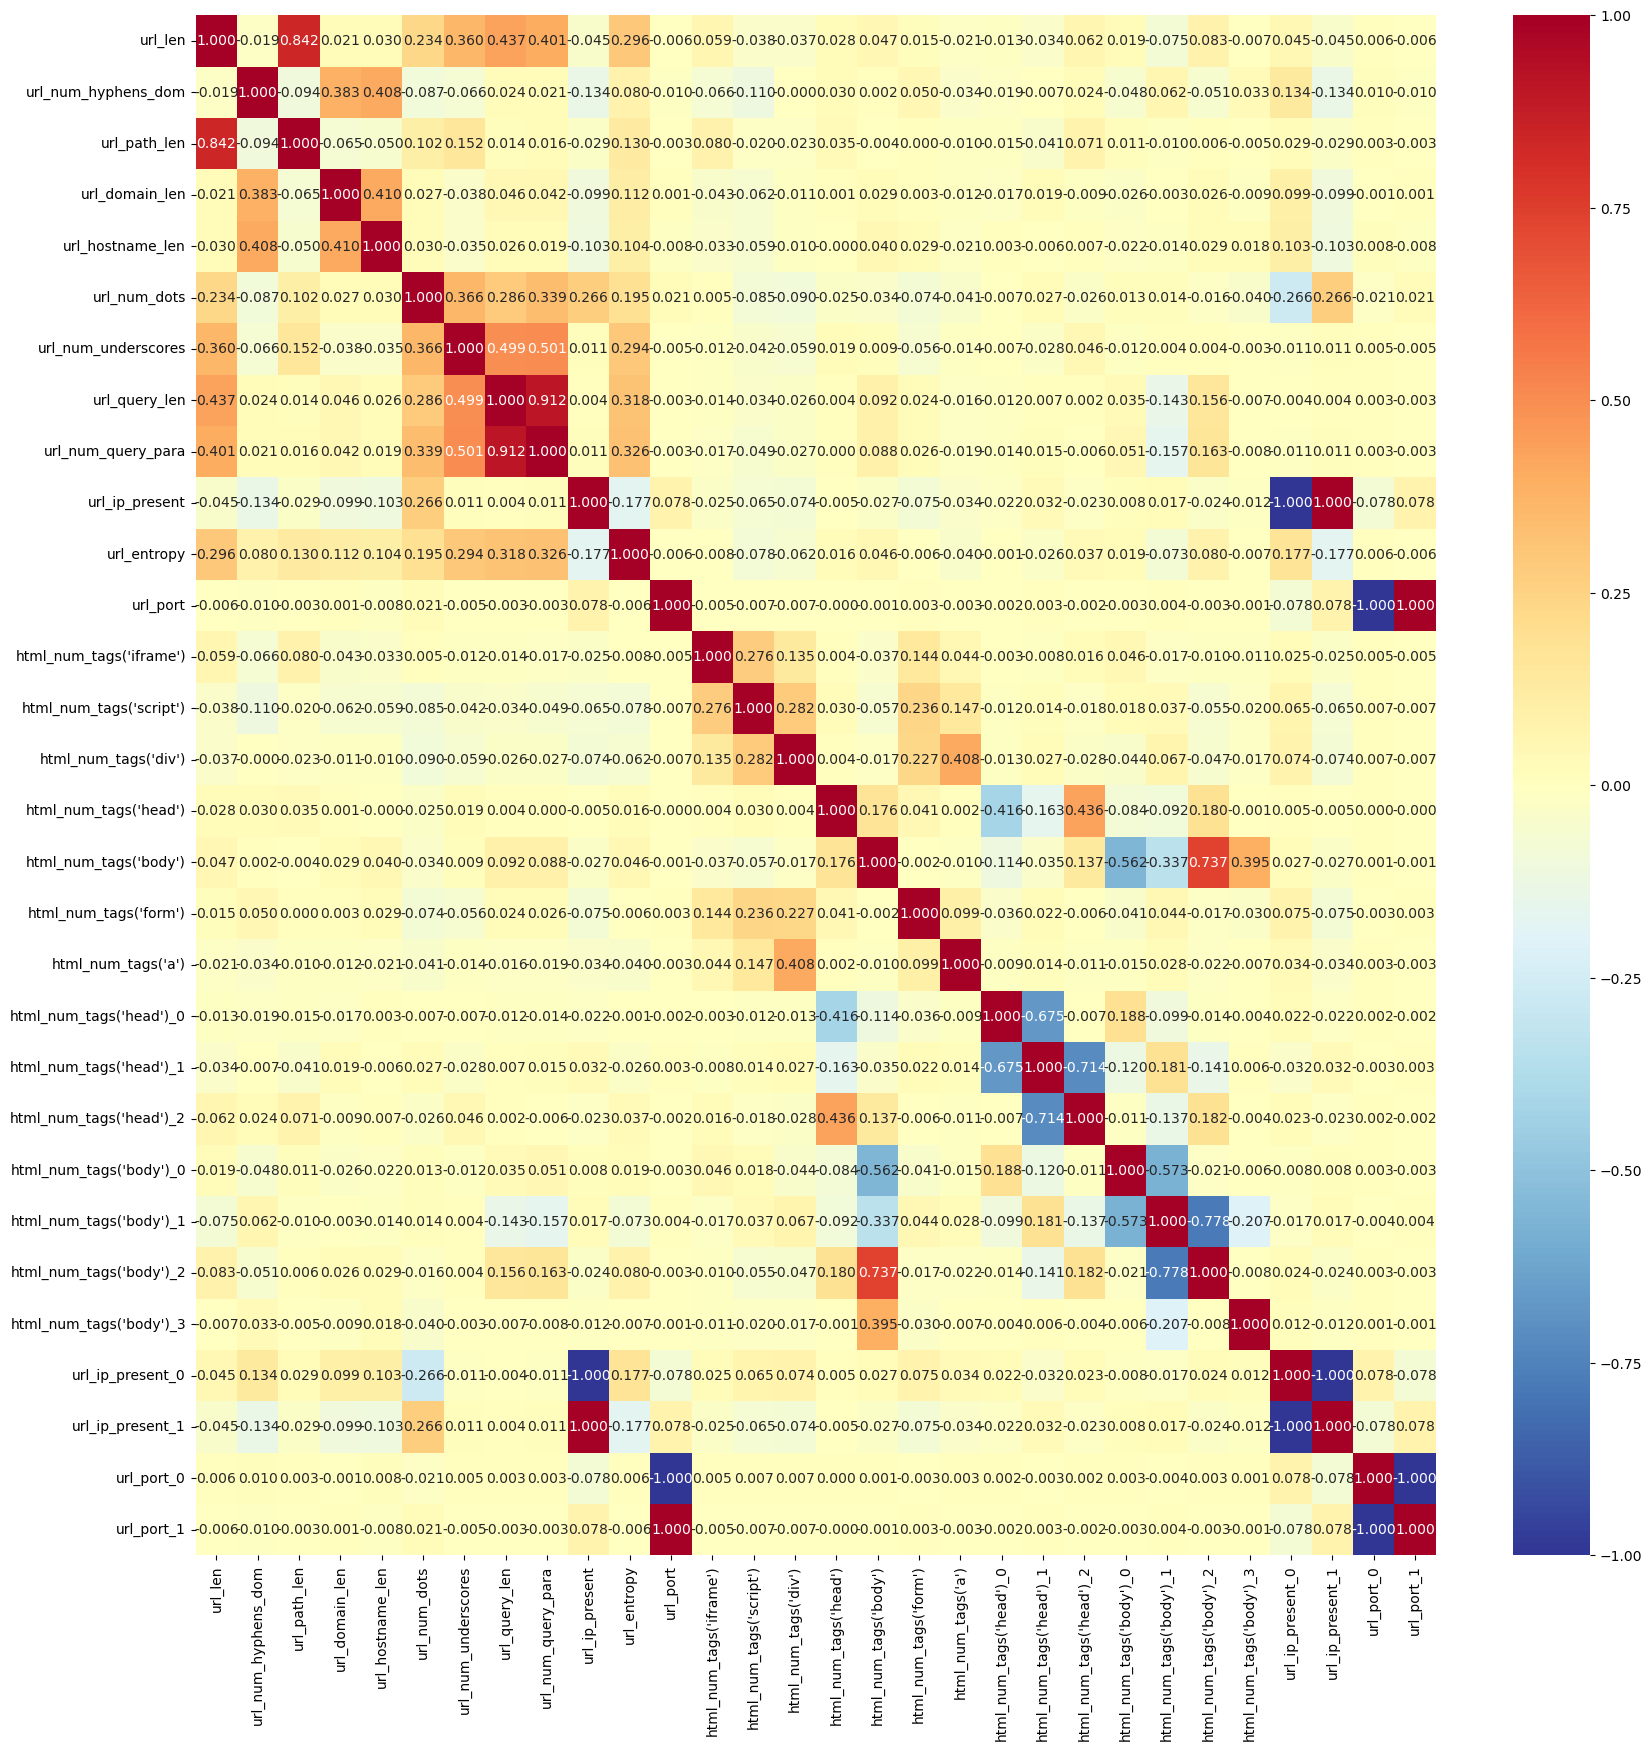

In [170]:
plt.figure(figsize = (20, 20))
sns.heatmap(df_test.corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값값
plt.show()

In [171]:
df_test.to_csv("df_test.csv", index = False)